# Aprendizaje No Supervisado con KMeans y Scikit-Learn

En este notebook aplicaremos un algoritmo de clustering, KMeans, para encontrar grupos en el dataset Iris. A diferencia del aprendizaje supervisado, en el aprendizaje no supervisado no usamos etiquetas para entrenar el modelo. En su lugar, buscamos patrones o agrupamientos en los datos de forma automática.

<a href="https://colab.research.google.com/github/Antonio-Tresol/ai_workshop_2025_fast_intro/blob/main/examples/unsupervised_learning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
</a>

## 1. Importar las bibliotecas necesarias


ejecute la celda a continuación para instalar las bibliotecas necesarias.

In [ ]:
%pip install matplotlib
%pip install scikit-learn
%pip install pandas
%pip install seaborn
%pip install numpy

Importamos las bibliotecas para el manejo y visualización de datos, y las que nos permitirán aplicar el algoritmo de clustering.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## 2. Cargar y preparar el dataset

Utilizamos el dataset Iris. Convertimos sus datos a un DataFrame para facilitar su manipulación. Aunque en este ejemplo no usamos las etiquetas originales para entrenar el modelo, las conservamos para compararlas con los clusters encontrados.

In [ ]:
iris = load_iris()
data = iris.data
feature_names = iris.feature_names

df = pd.DataFrame(data, columns=feature_names)
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3. Exploración de los datos

Veamos algunas visualizaciones para entender la distribución de los datos. Usaremos un pairplot para visualizar cómo se distribuyen las características.

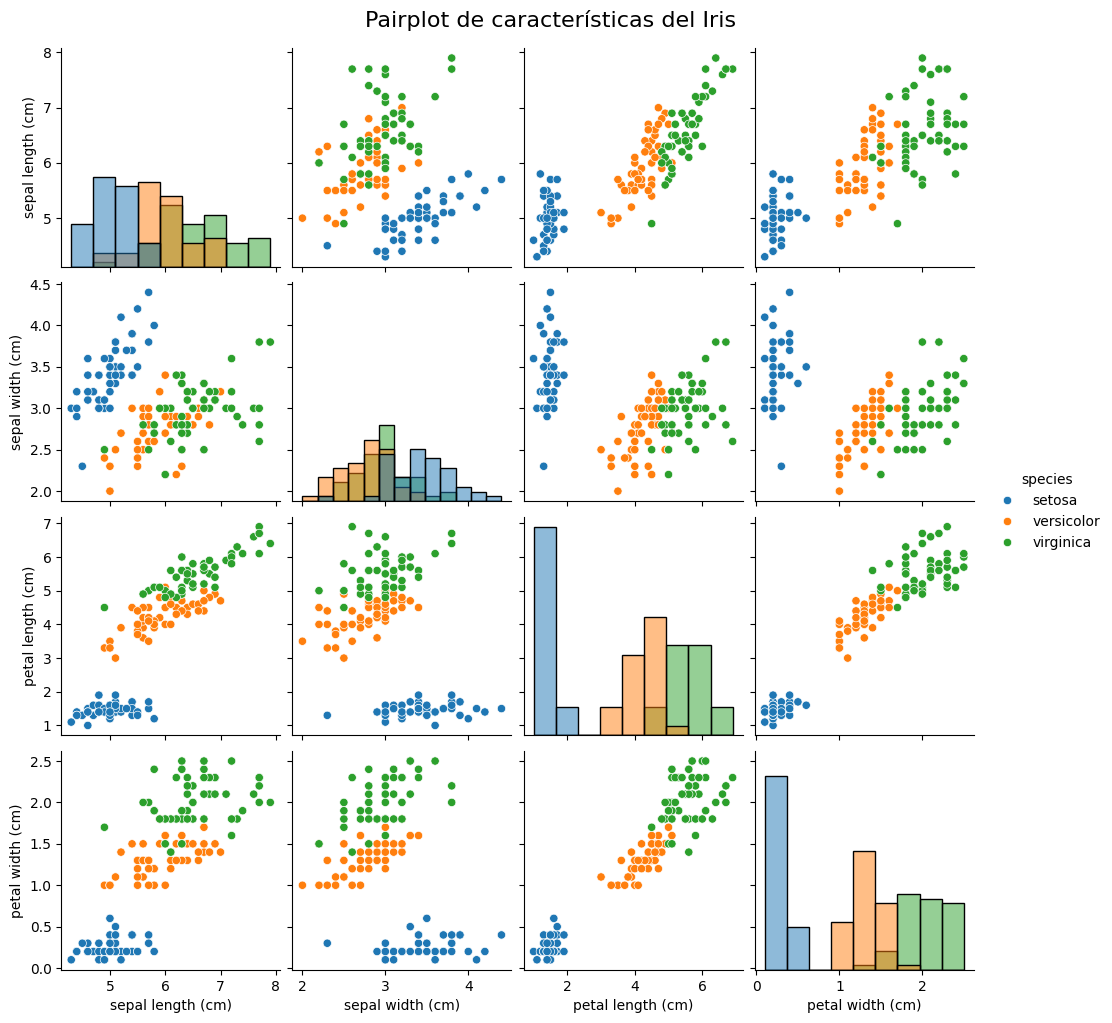

In [ ]:
sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("Pairplot de características del Iris", fontsize=16, y=1.02)
plt.show()

## 4. Aplicar KMeans

Utilizaremos KMeans para buscar tres clusters, ya que conocemos de antemano que hay tres especies en este dataset. Aunque en la práctica suele explorarse el número óptimo de clusters, aquí lo definimos como 3 para facilitar la comparación con las etiquetas reales.
### Entendiendo el algoritmo KMeans

K-means es un algoritmo de aprendizaje automático no supervisado utilizado para el *clustering* (agrupamiento). Su objetivo es particionar *n* puntos de datos en *k* grupos (clusters), donde cada punto de datos pertenece al grupo cuyo centroide (media) está más cercano.

### ¿Cómo funciona?

El algoritmo K-means opera de forma iterativa, siguiendo estos pasos:

1.  **Inicialización:**
    *   Se elige el número de clusters, *k*, que se desea encontrar.
    *   Se seleccionan *k* centroides iniciales de forma aleatoria.  Estos centroides pueden ser puntos de datos existentes o puntos generados aleatoriamente dentro del espacio de los datos.

2.  **Asignación:**
    *   Para cada punto de datos en el conjunto:
        *   Se calcula la distancia entre el punto y cada uno de los *k* centroides.
        *   Se asigna el punto al cluster cuyo centroide está más cerca (usando generalmente la distancia euclidiana).

3.  **Actualización:**
    *   Para cada cluster:
        *   Se recalcula el centroide del cluster. El nuevo centroide es la media de todos los puntos de datos que pertenecen a ese cluster.  Es decir, se calcula el promedio de las coordenadas de todos los puntos en ese grupo.

4.  **Repetición:**
    *   Se repiten los pasos 2 (Asignación) y 3 (Actualización) hasta que se cumpla uno de los siguientes criterios de convergencia:
        *   Los centroides ya no cambian significativamente (o no cambian en absoluto) entre iteraciones.
        *   Los puntos de datos permanecen en el mismo cluster entre iteraciones.
        *   Se alcanza un número máximo predefinido de iteraciones.

<div style="text-align:center">
<img src="https://ml-explained.com/articles/kmeans-explained/k_means.gif" width="900" style="border: 1px solid black; border-radius: 10px;">

<p><strong>Figura 1:</strong> Ejemplo de K means en acción. </p>
</div>
### ¿Cómo evaluamos el rendimiento de KMeans?


En unsupervised learning, no tenemos etiquetas verdaderas para comparar con las predicciones del modelo. Por lo tanto, la evaluación de los resultados de clustering es más subjetiva y depende del contexto del problema. Algunas métricas comunes para evaluar el rendimiento de KMeans son:

* **Inercia:** La inercia mide la suma de las distancias cuadradas de cada punto de datos al centroide más cercano. En general, se prefiere una inercia más baja, ya que indica que los puntos están más cerca de los centroides de sus clusters.

* **Coeficiente de Silueta:** El coeficiente de silueta es una medida de cuán similar es un punto a su propio cluster (cohesión) en comparación con otros clusters (separación). El coeficiente de silueta varía de -1 a 1, donde un valor más alto indica que el punto es bien ajustado a su propio cluster y mal ajustado a clusters vecinos. Nota: usaremos el coeficiente de silueta para evaluar el rendimiento de KMeans en este ejemplo.




In [ ]:
# Seleccionamos sólo las características numéricas para el clustering
X = df.drop(columns="species")

# Especificamos el número de clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustamos el modelo a los datos
kmeans.fit(X)

# Obtenemos los clusters asignados
df["cluster"] = kmeans.labels_

print("Centroides encontrados:")
centroids = kmeans.cluster_centers_
print(centroids.round(2))

# Calculamos la puntuación de silueta para evaluar el agrupamiento
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Coeficiente de silueta: {sil_score:.2f}")

Centroides encontrados:
[[ 6.85  3.08  5.72  2.05 -0.  ]
 [ 5.01  3.43  1.46  0.25  1.  ]
 [ 5.88  2.74  4.39  1.43  2.  ]]
Coeficiente de silueta: 0.68


## 5. Visualización de los clusters

Visualizamos los clusters utilizando un gráfico de dispersión. En este ejemplo, usaremos dos de las características (por ejemplo: 'sepal length (cm)' y 'sepal width (cm)') para mostrar cómo se agrupan los datos.

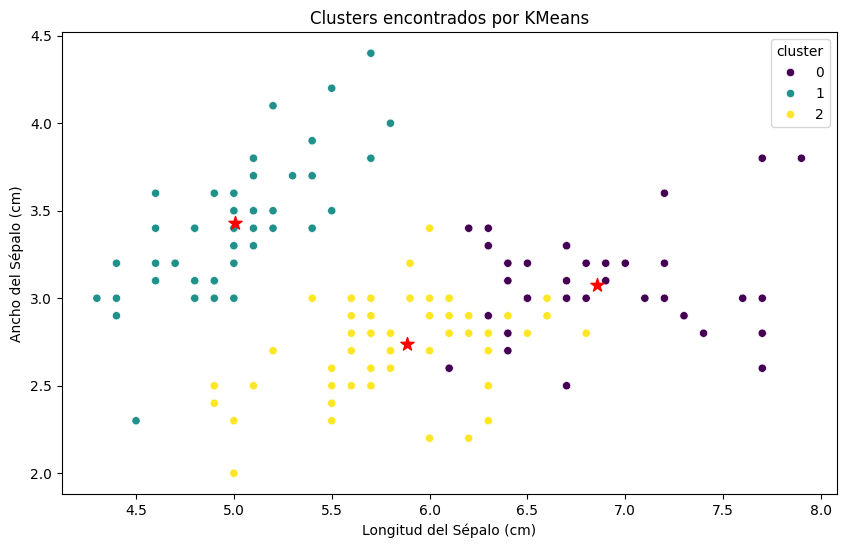

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="cluster",
    palette="viridis",
)
centroids = kmeans.cluster_centers_
plt.scatter(
    x=centroids[:, 0], y=centroids[:, 1], marker="*", s=100, c="red", label="Centroides"
)
plt.title("Clusters encontrados por KMeans")
plt.xlabel("Longitud del Sépalo (cm)")
plt.ylabel("Ancho del Sépalo (cm)")
plt.show()

## 6. Comparación con las etiquetas reales

Aunque KMeans es un método no supervisado, podemos comparar los clusters encontrados con las etiquetas originales para ver qué tan bien ha logrado agrupar las muestras según las especies reales. Ten en cuenta que el asignamiento de números a cada cluster puede variar y no coincide necesariamente con el orden de las especies.

Podemos visualizar esta comparación mediante un gráfico de dispersión que muestre ambas clasificaciones.

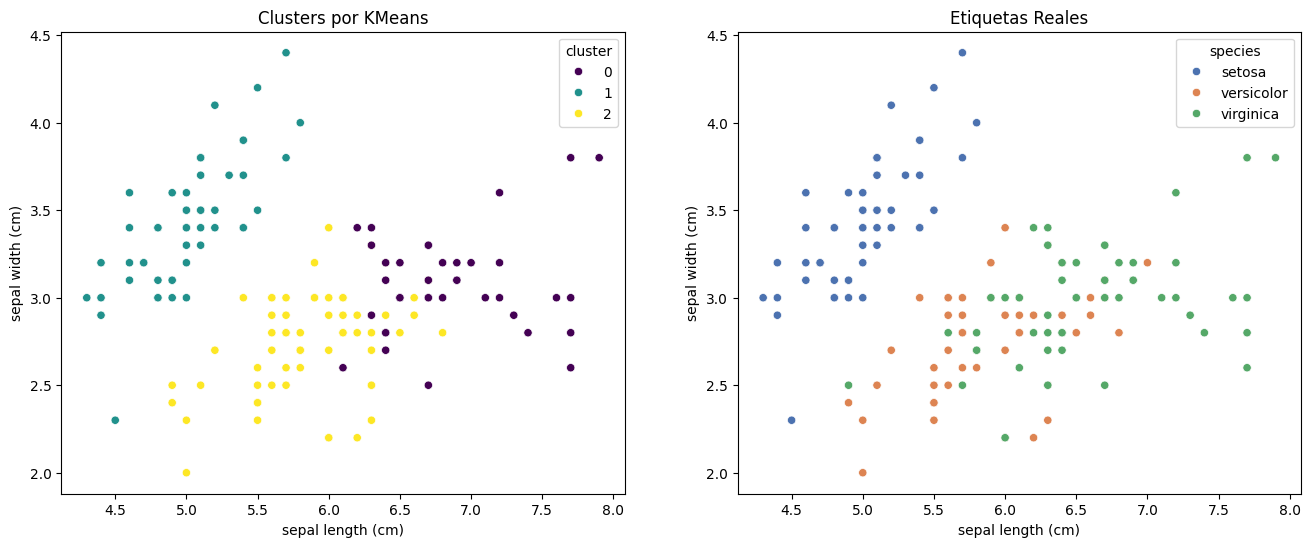

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de los clusters encontrados
sns.scatterplot(
    data=df,
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="cluster",
    palette="viridis",
    ax=axes[0],
)
axes[0].set_title("Clusters por KMeans")

# Gráfico con las especies reales
sns.scatterplot(
    data=df,
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="species",
    palette="deep",
    ax=axes[1],
)
axes[1].set_title("Etiquetas Reales")

plt.show()

## 7. Conclusión

Hemos aplicado el algoritmo KMeans para encontrar grupos en el dataset Iris sin utilizar las etiquetas reales durante el entrenamiento. A través de la visualización y el cálculo del coeficiente de silueta, podemos evaluar la calidad del agrupamiento y comparar los resultados con las clases verdaderas.

Este ejemplo muestra cómo se puede aplicar el aprendizaje no supervisado para descubrir estructuras en los datos, siendo una técnica útil en escenarios donde no se dispone de etiquetas.